In [1]:
%matplotlib inline              
from pylab import *   

In [2]:
def MM1K(K=3,lambda_ = 4.,mu = 5.,N0 = 2,Tmax=100):
    N0       = min(N0,K)# enforcing buffer length constraint
    p        = lambda_/(mu+lambda_) # probability that the next event is an arrival when N(t) > 0
    T        = [0]  # list of instants of events (arrivals/departures)
    N        = [N0] # initial number of customers in the system, list of number of customers at arrivals/departures
    losses   = 0    # number of lost clients
    arrivals = 0    
    while T[-1]<Tmax:
        if N[-1]==0:
            # inter-event when N(t)=0:
            tau      = -1./lambda_*log(rand()) 
            event    = 1
        else:
            tau   = -1./(lambda_+mu)*log(rand()) # inter-event when N(t)>0
            event = 2*(rand()<p)-1 # +1 for an arrival, -1 for a departure
        # Unlike in function MM1, when N[-1]==K, if a new client arrives this client is lost 
        # and the number of lost clients is incremented by 1
        if event==1:
            arrivals +=1    # event==1 corresponds to an arrival
            if N[-1]==K:
                ###########################
                # supply value of events and update losses
                # when a customer arrives while N[-1]==K
                event   = 0 
                losses  = losses + 1
                ###########################
        N = N + [N[-1]+event]
        T = T + [T[-1]+tau]

    T    = T[:-1] # event after Tmax is discarded
    N    = N[:-1]
    return array(T),array(N),arrivals,losses

#------------------
T,N,arrivals,losses = MM1K(K=3,lambda_ = 4.,mu = 5.,N0 = 2,Tmax=10**3)
V1 = losses/arrivals


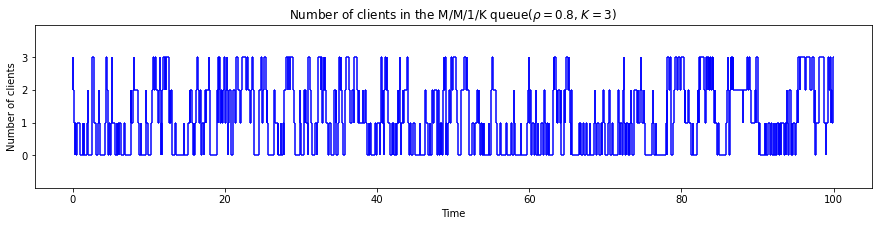

In [3]:
# Plotting the evolution of the number of clients in the system

def step(x,y,Tmax=0,color='b'):
    # plots a step function representing the number
    # of clients in the system at each instant
    if Tmax==0:
        Tmax = max(x)
    x = append(x,[Tmax])  # number of clients
    y = append(y,[y[-1]]) # instants of events
    for k in range(len(x)-1):
        vlines(x[k+1],y[k],y[k+1],color=color)
        hlines(y[k],x[k],x[k+1],color=color)

K=3
T,N,arrivals,losses = MM1K()
rcParams['figure.figsize'] = [15,3]
step(T,N)
xlabel('Time')
ylabel('Number of clients')
lambda_ = 4.
mu = 5.
title('Number of clients in the M/M/1/K queue' 
      +r'($\rho =%g$, $K=%g$)'%(lambda_/mu,K))
axis(ymin=-1,ymax=4)
yticks(range(4), range(4));

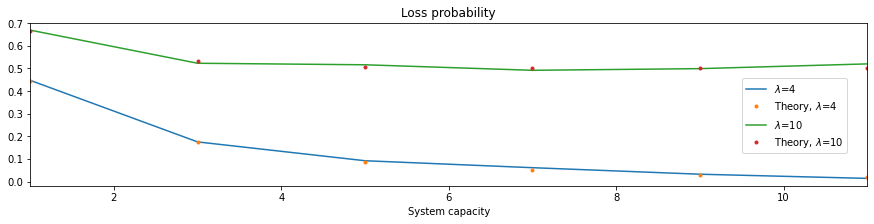

In [4]:
Ks        = arange(1,12,2) # system capacities
Ploss_est = zeros(len(Ks)) # estimated loss probabilities

########################################################
# complete the value returned by function estimate_Ploss
# that estimates the loss probability from the obbserved 
# number of arrivals and number of lost arrivals
def estimate_Ploss(arrivals, losses):
    return losses / arrivals
########################################################
mu = 5
for lambda_ in [4,10]:
    # estimated loss probabilities:
    for index,K in enumerate(Ks):
        T,N,arrivals,losses = \
        MM1K(lambda_=lambda_,K=K,Tmax=10**3)
        Ploss_est[index] = estimate_Ploss(arrivals, losses)
    plot(Ks,Ploss_est,label="$\lambda$=%d"%lambda_)
    # loss probabilities:
    rho = lambda_/mu
    Ploss = (1-rho)/(1-rho**(Ks+1))*rho**Ks 
    plot(Ks,Ploss,'.',label="Theory, $\lambda$=%d"%lambda_)
axis(xmin=1,xmax=11)
xlabel("System capacity")
title("Loss probability")
legend(loc=(.85,.2))

#--------------------------
V2 = estimate_Ploss(2,1) 

In [5]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 4:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,3))
for x in results:
    try:
        print(x+" = {0:.2f}".format(eval(x)))
    except:
        print(x+": variable is undefined")   

---------------------------
RESULTS SUPPLIED FOR LAB 4:
---------------------------
V1 = 0.17
V2 = 0.50
